questions/to-do
- insert image
- scatterplot, new labels only work for one of the graphs

## Is Blood Pressure in Men and Women Related to Exercised Induced Angina?

In [101]:
![alt text](chest_pain.jpg "chest_pain.jpg")

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `[alt text](chest_pain.jpg "chest_pain.jpg")'


    After coming across a dataset investigating various types of heart disease, I found interesting discrepancies in the data concerning Exercised Induced Angina (EIA, for the purposes of this report). I propose further research to determine whether both the sex and resting blood presure of an individual is indeed predictive of developing EIA, or if other factors like age, location, bad sample size, and other qualitative factors are to blame for the discrepancy.

Information about the data:
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
- The data comes from Cleveland's Mayo Clinic, yet the patient home locations are unknown.
- Kaggle

Before continuing, it is important to establish the same vocabulary for a few key terms.

Exercised Induced Angina: Angina is generally caused from not getting enough blood through the arteries to supply the walls of the heart with enough blood flow to adequately pump. This condition is specifically brought on by exercise.

Resting Blood Pressure (RBS): Optimal blood pressure typically is defined as 120 mm Hg systolic (which is the pressure as your heart beats) over 80 mm Hg diastolic (which is the pressure as your heart relaxes). For your resting heart rate, the target is between 60 and 100 beats per minute (bpm).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("heart.csv")


## Problem #1: Inconsistent Sample Size between Men & Women

The first thing I noticed when exploring the data was that Women in the dataset had higher blood pressure than Men did and were more likely to have EIA. 

Text(28.8291,0.5,'Resting Blood Pressure (RBS)')

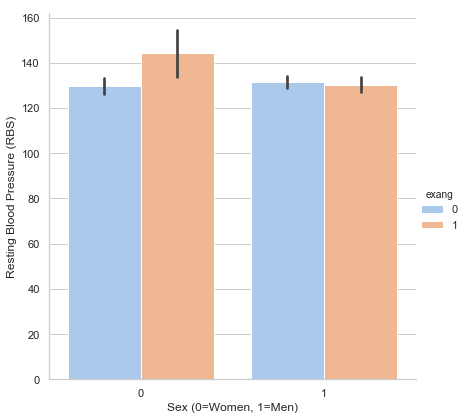

In [92]:
sns.set(style="whitegrid")
sex_exang = sns.catplot(x="sex", y="trestbps", hue="exang", data=df,
                   height=6, kind="bar", palette="pastel", ci=95)
plt.xlabel("Sex (0=Women, 1=Men)")
plt.ylabel("Resting Blood Pressure (RBS)")

I then looked at the sample size between men & women to see if there was a descrepancy since the variation among women was much larger than it was with men.

In [75]:
#how many men vs women sampled
men_count=df.sex.value_counts()[1]
women_count=df.sex.value_counts()[0]
print("# of men sampled: " + str(men_count))
print("# of women sampled: " + str(women_count))

# of men sampled: 207
# of women sampled: 96


As it turns out, the samples were not equal by a nearly 2:1 ratio. The sample for men was more stable than it was for women. 

## Problem #2: A Similar Discrepancy in the Number of EIA cases

Secondly, the number of people who also experience EIA was by a 2:1 ratio. While this may be just a coincidence, it is worth exploring further. 

In [91]:
#chart of people with exang, 
men_exang=df.exang.value_counts()[1]
women_exang=df.exang.value_counts()[0]
print("# of people w/ EIA: " + str(men_exang))
print("# of people w/o EIA: " + str(women_exang))

# of people w/ EIA: 99
# of people w/o EIA: 204


## Problem #3: Resting Heart Rate vs. Maximum Heart Rate 

Despite the greater variability of women having EIA, there were many men who had EIA clustered between age 50 and 60. 

Text(488.573,0.5,'Resting Blood Pressure (RBS)')

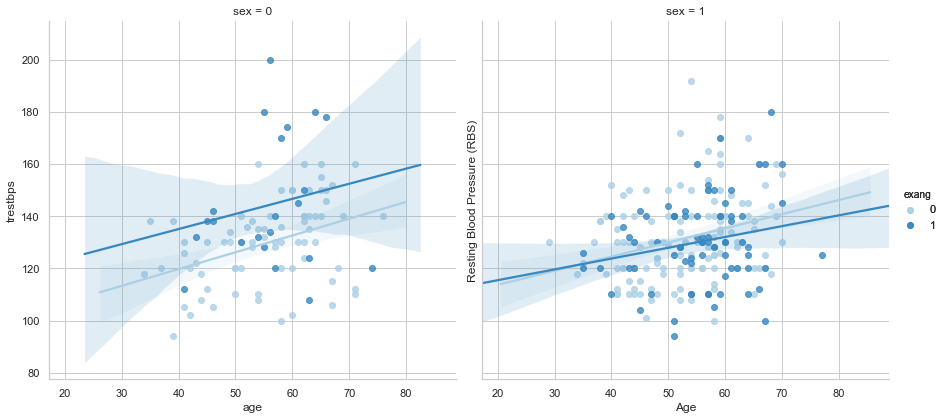

In [102]:
#linear regression + Facetgrid
facets = sns.lmplot(data=df, x="age", y="trestbps", col="sex", hue="exang", palette="Blues", height=6)
facets.add_legend()
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure (RBS)")

Text(488.547,0.5,'Maximum Heart Rate (MHR)')

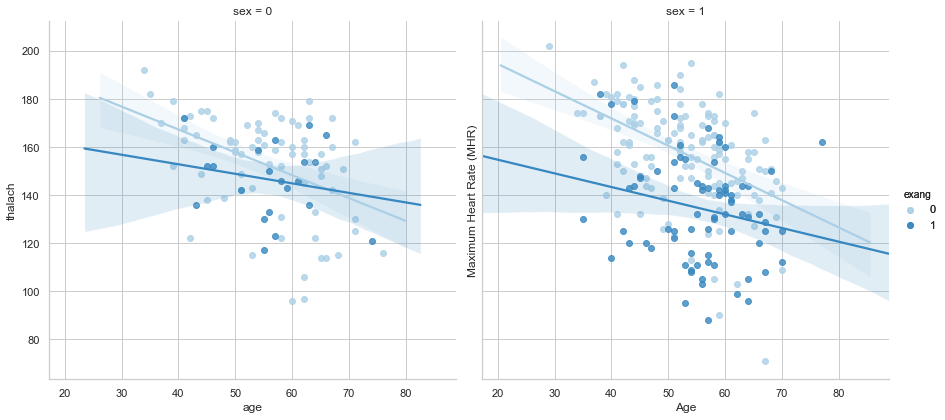

In [98]:
facets = sns.lmplot(data=df, x="age", y="thalach", col="sex", hue="exang", palette="Blues", height=6)
facets.add_legend()
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (MHR)")

## Hypothesis

    EIA is considered an early identifier of risk for developing chronic heart disease in the future. A better understand of the leading indicators of heart disease such as EIA can improve our society's health, individual lifespans, more expensive chronic illnesses at hospitals, and more time-intensive for experienced doctors.
    While age, sex, and resting heartbeat (RBS) provide insights, my hypothesis is the outcomes from this dataset are onlt telling a partial story. I propose two main solutions: expanding the sample size to more cardiac hospitals for a more balanced sample and taking more detailed metrics about the individual patients such as home location, weight, and height.

## Rollout Plan, Phase I - Preparation

    The first step to would be expand the experiment's reach to various other cardiac units across the country. The key metric is getting access to several thousand patient records in order to get the proper sample size. Ideally, hospitals/clinics are distributed as best as possible grographically. Business Development and Partnerships can be leveraged.

    Secondly, researchers will collect the same data as the previous data set in addition to:
    - weight
    - height
    - hospital/clininc location
    - patient's home city & state
    - ??

    Finally, data will be collected at the hospital/clinic level to avoid Simpson's paradox.

## Rollout Plan, Phase II

    Is AB testing necessary?

## Evaluation Plan

In [84]:
df.groupby('sex')['exang']

In [ ]:

df['men_exang'] = / men_count
df['women_exang'] = /women_count
men_no_exang
women_no_exang

Text(28.8291,0.5,'Resting Blood Pressure')

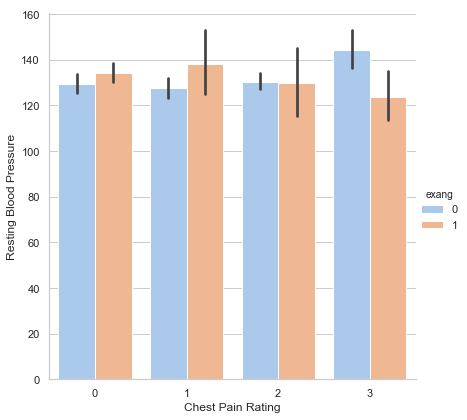

In [87]:
sns.set(style="whitegrid")

sex_pain = sns.catplot(x="cp", y="trestbps", hue="exang", data=df,
                   height=6, kind="bar", palette="pastel", ci=95)
plt.xlabel("Chest Pain Rating")
plt.ylabel("Resting Blood Pressure")

In [82]:
#chart of men and women who do and do not have exang
df.loc[lambda df: df['sex'] == 1]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1


Text(482.98,0.5,'Resting Blood Pressure (RBS)')

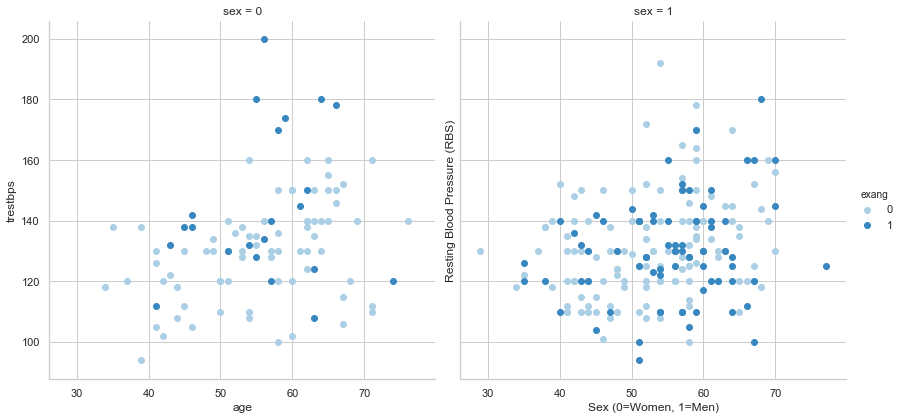

In [97]:
facets = sns.FacetGrid(df, col="sex", hue="exang", palette="Blues", height=6)
facets = facets.map(plt.scatter, "age", "trestbps")
facets.add_legend()
plt.xlabel("Sex (0=Women, 1=Men)")
plt.ylabel("Resting Blood Pressure (RBS)")